<a href="https://colab.research.google.com/github/sabrinabauche/Data-Science/blob/main/CRISP_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **CRISP-DM Method**

**1. Business Understanding**


*   Forecating transactions- ikely a regression model
*   Data for 3 years

**2. Data Understanding**

In [ ]:
import pandas as pd

In [ ]:
url = "https://raw.githubusercontent.com/sabrinabauche/Data-Science/main/regression.csv"

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [ ]:
df.tail()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680
4211,2021,Dec,CC302,4000001,Accounts Payable,Liability,-1020.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4212 non-null   int64  
 1   Month                4212 non-null   object 
 2   Cost Centre          4212 non-null   object 
 3   Account              4212 non-null   int64  
 4   Account Description  4212 non-null   object 
 5   Account Type         4212 non-null   object 
 6   Amount               4212 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 230.5+ KB


In [ ]:
# Loop through each column in the DataFrame
for col in df.columns:
    # Print the column name and the number of unique values
    print(col, len(df[col].unique()))

    # Print the list of unique values in that column
    print(df[col].unique())

    # Print a line to separate each column’s output
    print('---')

Year 3
[2019 2020 2021]
---
Month 12
['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
---
Cost Centre 9
['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
---
Account 13
[1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
---
Account Description 13
['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
---
Account Type 4
['Revenue' 'Expense' 'Asset' 'Liability']
---
Amount 3956
[1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]
---


In [ ]:
df.describe()

,Year,Account,Amount
count,4212.000000,4.212000e+03,4212.000000
mean,2020.000000,2.076925e+06,476.470421
std,0.816594,9.167528e+05,477.296234
min,2019.000000,1.000000e+06,-1020.000000
25%,2019.000000,1.000004e+06,268.044500
50%,2020.000000,2.000002e+06,512.998500
75%,2021.000000,3.000000e+06,755.960250
max,2021.000000,4.000001e+06,2378.880000


In [ ]:
df.dtypes

,0
Year,int64
Month,object
Cost Centre,object
Account,int64
Account Description,object
Account Type,object
Amount,float64


**Visualize data**

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

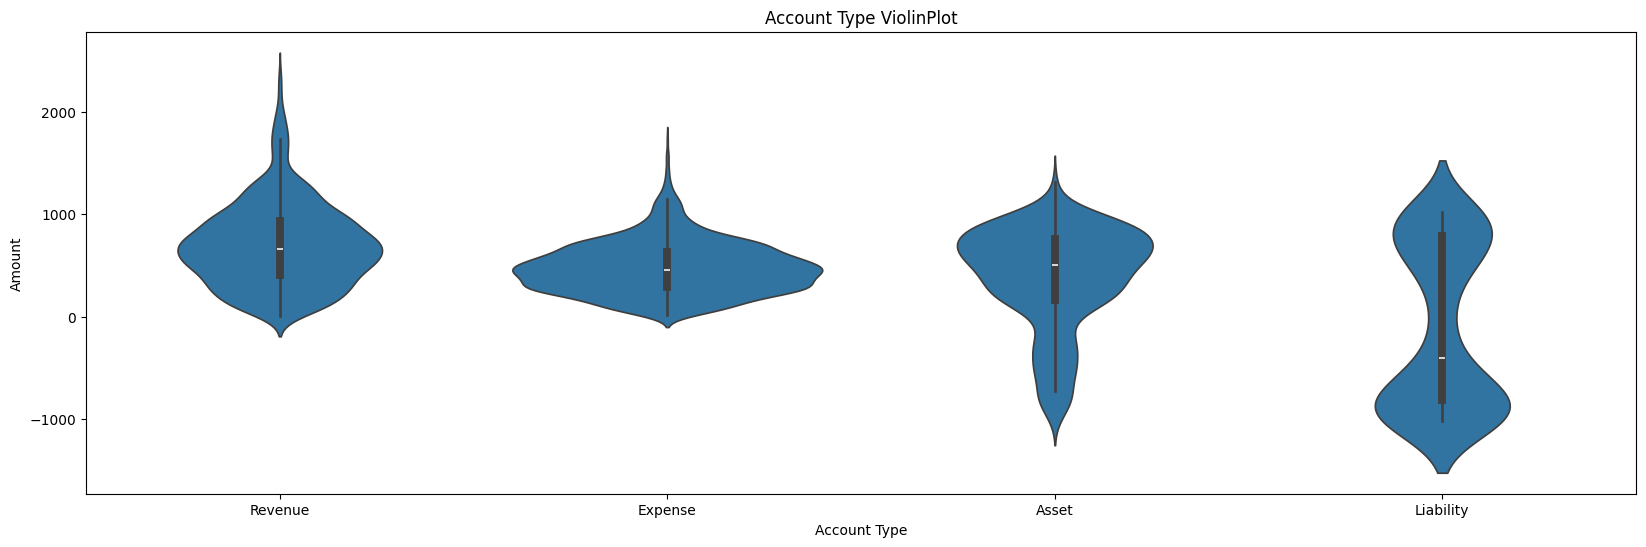

In [ ]:
plt.figure(figsize=(20,6))
sns.violinplot(x='Account Type', y='Amount', data=df).set_title('Account Type ViolinPlot')
plt.show()

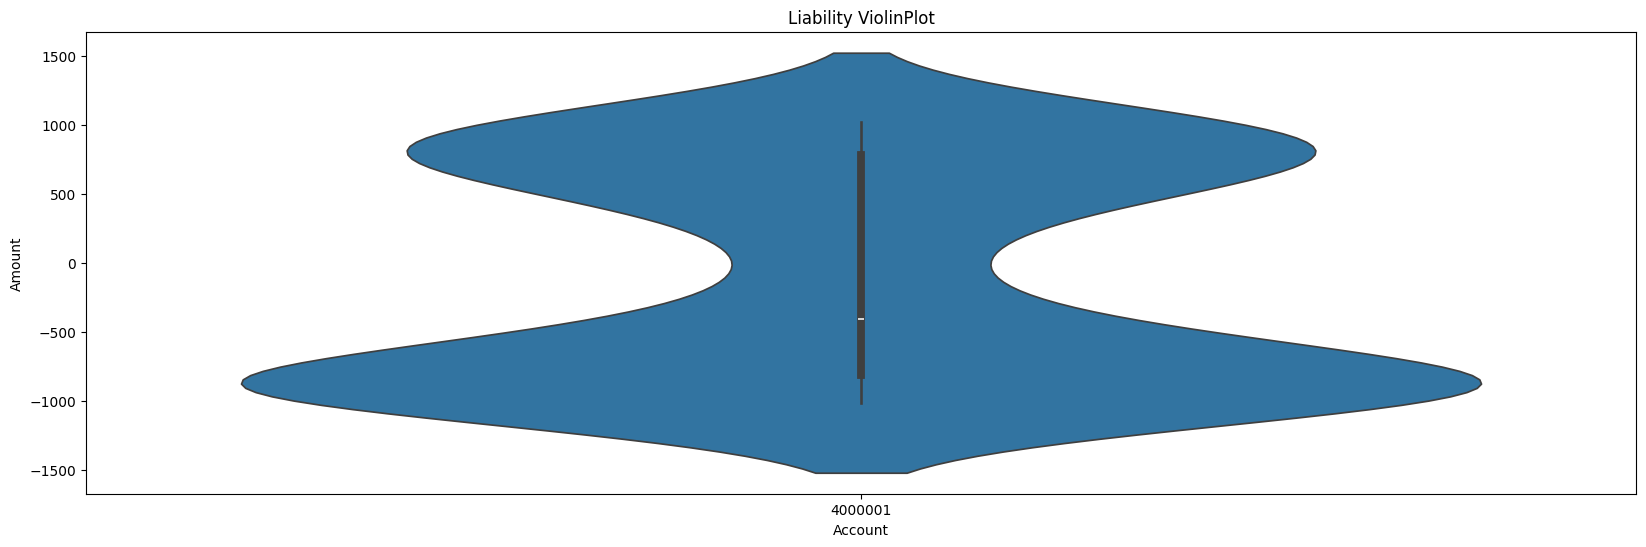

In [ ]:
plt.figure(figsize=(20,6))
sns.violinplot(x='Account', y='Amount', data=df[df['Account Type']=='Liability']).set_title('Liability ViolinPlot')
plt.show()

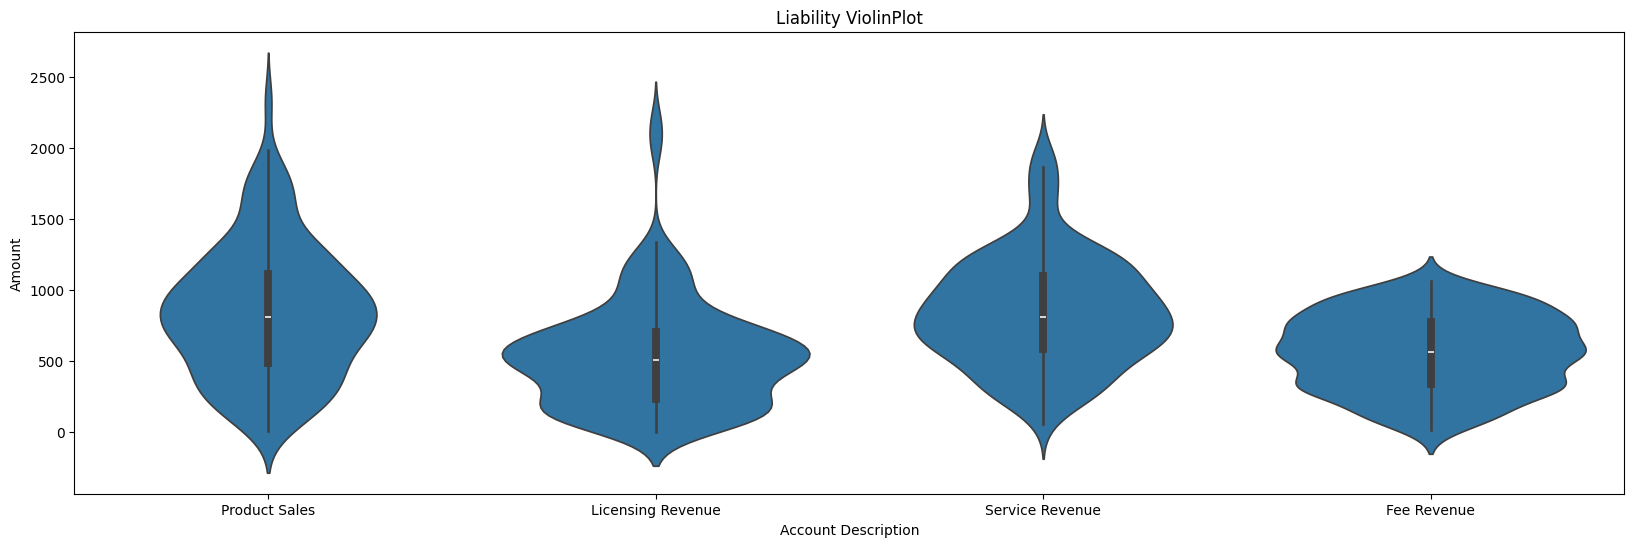

In [ ]:
plt.figure(figsize=(20,6))
sns.violinplot(x='Account Description', y='Amount', data=df[df['Account Type']=='Revenue']).set_title('Liability ViolinPlot')
plt.show()

**Review trends**

In [ ]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [ ]:
monthmap = {
    'Jan':1,
    'Feb':2,
    'Mar':3,
    'Apr':4,
    'May':5,
    'Jun':6,
    'Jul':7,
    'Aug':8,
    'Sep':9,
    'Oct':10,
    'Nov':11,
    'Dec':12,
}

In [ ]:
df['Month'] = df['Month'].map(monthmap)


In [ ]:
monthmap['Jan']

1

In [ ]:
df['Day'] = 1

In [ ]:
print(df.columns)

Index(['Year', 'Month', 'Cost Centre', 'Account', 'Account Description',
       'Account Type', 'Amount', 'Day'],
      dtype='object')


In [ ]:
df['Date'] = df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['Day'].astype(str)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.dtypes

,0
Year,int64
Month,int64
Cost Centre,object
Account,int64
Account Description,object
Account Type,object
Amount,float64
Day,int64
Date,datetime64[ns]


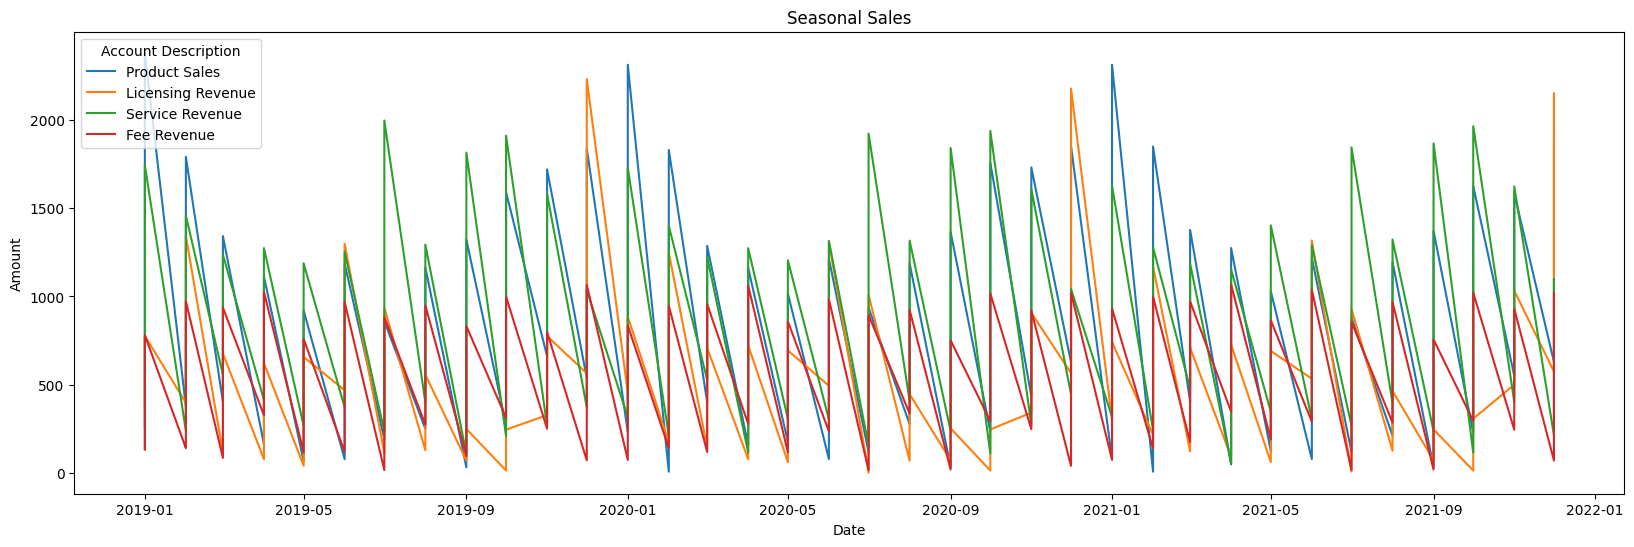

In [ ]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Type']=='Revenue']).set_title('Seasonal Sales')
plt.show()

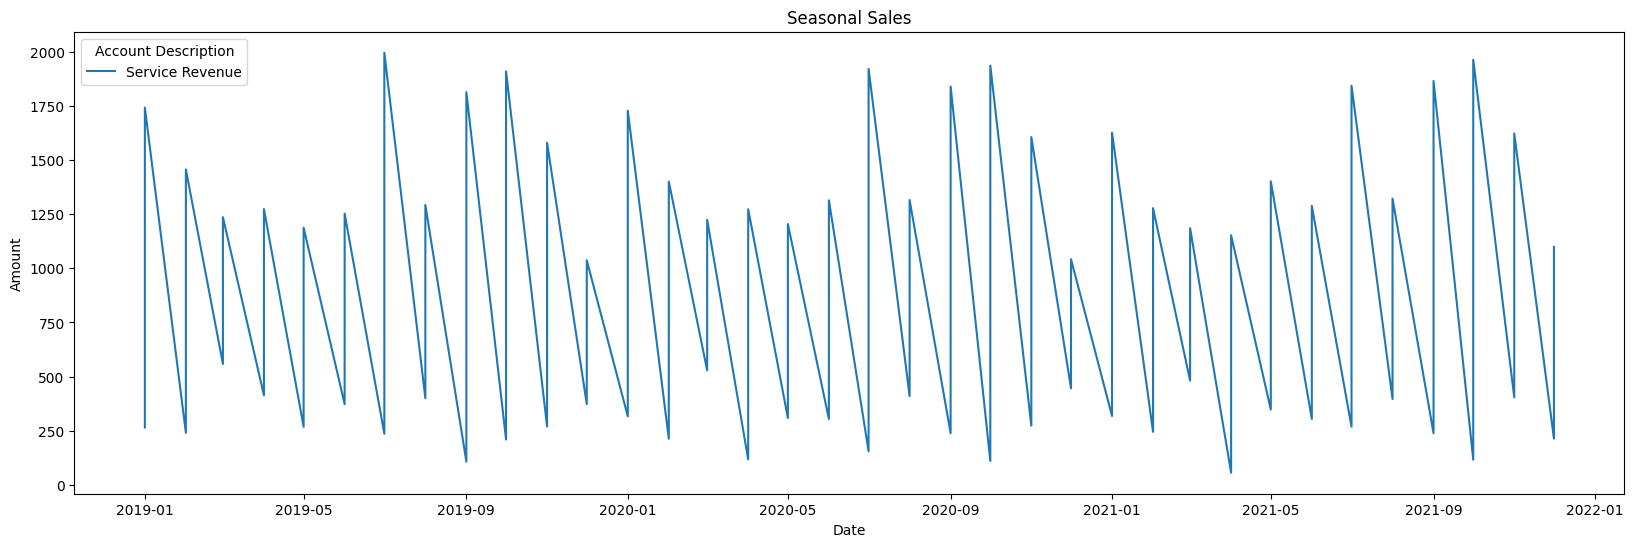

In [ ]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Description']=='Service Revenue']).set_title('Seasonal Sales')
plt.show()

**Correlation**

In [ ]:
df.select_dtypes(include='number').corr()

,Year,Month,Account,Amount,Day
Year,1.000000e+00,-5.695624e-13,-5.466737e-15,0.014750,NaN
Month,-5.695624e-13,1.000000e+00,2.276590e-16,0.024473,NaN
Account,-5.466737e-15,2.276590e-16,1.000000e+00,-0.417946,NaN
Amount,1.475040e-02,2.447256e-02,-4.179456e-01,1.000000,NaN
Day,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Account Description'].unique()

array(['Product Sales', 'Licensing Revenue', 'Service Revenue',
       'Fee Revenue', 'Cost of Good Sold', 'Staff Expenses',
       'Technology Expenses', 'Property Expenses', 'Purchases',
       'Cash at Bank', 'Inventory', 'Accounts Receivable',
       'Accounts Payable'], dtype=object)

In [ ]:
pd.get_dummies(df['Account'])

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,False,False,False,False,False,False,False,False,True,False,False,False,False
4208,False,False,False,False,False,False,False,False,False,True,False,False,False
4209,False,False,False,False,False,False,False,False,False,False,True,False,False
4210,False,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
corrdict = {}
for key, row in df.join(pd.get_dummies(df['Account'])).iterrows():
    corrdict[key] = {int(row['Account']):row['Amount']}

In [ ]:
corrdf = pd.DataFrame.from_dict(corrdict).T.fillna(0)

In [ ]:
corrdf.corr()

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
1000000,1.000000,-0.058293,-0.065252,-0.064706,-0.061763,-0.066141,-0.065989,-0.065547,-0.061377,0.007528,-0.070332,-0.060539,0.010549
1000001,-0.058293,1.000000,-0.060742,-0.060233,-0.057494,-0.061569,-0.061428,-0.061016,-0.057135,0.007007,-0.065471,-0.056355,0.009820
1000002,-0.065252,-0.060742,1.000000,-0.067424,-0.064358,-0.068920,-0.068762,-0.068301,-0.063956,0.007844,-0.073287,-0.063083,0.010992
1000004,-0.064706,-0.060233,-0.067424,1.000000,-0.063819,-0.068343,-0.068186,-0.067728,-0.063420,0.007778,-0.072673,-0.062555,0.010900
2000000,-0.061763,-0.057494,-0.064358,-0.063819,1.000000,-0.065235,-0.065085,-0.064648,-0.060536,0.007424,-0.069369,-0.059710,0.010404
2000001,-0.066141,-0.061569,-0.068920,-0.068343,-0.065235,1.000000,-0.069699,-0.069231,-0.064827,0.007951,-0.074286,-0.063942,0.011142
2000002,-0.065989,-0.061428,-0.068762,-0.068186,-0.065085,-0.069699,1.000000,-0.069072,-0.064679,0.007933,-0.074115,-0.063796,0.011116
2000003,-0.065547,-0.061016,-0.068301,-0.067728,-0.064648,-0.069231,-0.069072,1.000000,-0.064244,0.007879,-0.073618,-0.063368,0.011041
2000005,-0.061377,-0.057135,-0.063956,-0.063420,-0.060536,-0.064827,-0.064679,-0.064244,1.000000,0.007378,-0.068935,-0.059337,0.010339
3000000,0.007528,0.007007,0.007844,0.007778,0.007424,0.007951,0.007933,0.007879,0.007378,1.000000,0.008455,0.007277,-0.001268


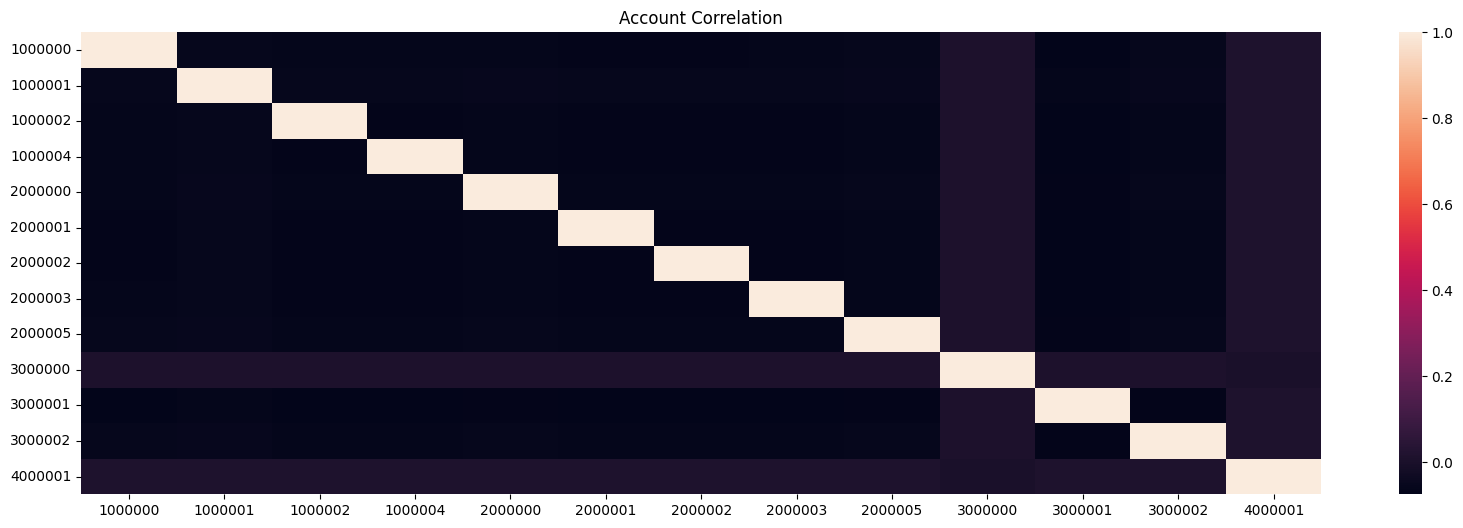

In [ ]:
plt.figure(figsize=(20,6))
sns.heatmap(corrdf.corr()).set_title('Account Correlation')
plt.show()

In [ ]:
df[df['Account']==3000000]

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Day,Date
9,2019,1,CC100,3000000,Cash at Bank,Asset,476.713,1,2019-01-01
22,2019,1,CC101,3000000,Cash at Bank,Asset,464.197,1,2019-01-01
35,2019,1,CC102,3000000,Cash at Bank,Asset,-296.261,1,2019-01-01
48,2019,1,CC200,3000000,Cash at Bank,Asset,750.000,1,2019-01-01
61,2019,1,CC201,3000000,Cash at Bank,Asset,187.647,1,2019-01-01
...,...,...,...,...,...,...,...,...,...
4156,2021,12,CC201,3000000,Cash at Bank,Asset,413.616,1,2021-12-01
4169,2021,12,CC202,3000000,Cash at Bank,Asset,375.657,1,2021-12-01
4182,2021,12,CC300,3000000,Cash at Bank,Asset,-492.546,1,2021-12-01
4195,2021,12,CC301,3000000,Cash at Bank,Asset,-579.986,1,2021-12-01


In [ ]:
df[df['Account']==4000001]

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Day,Date
12,2019,1,CC100,4000001,Accounts Payable,Liability,980.0,1,2019-01-01
25,2019,1,CC101,4000001,Accounts Payable,Liability,200.0,1,2019-01-01
38,2019,1,CC102,4000001,Accounts Payable,Liability,-980.0,1,2019-01-01
51,2019,1,CC200,4000001,Accounts Payable,Liability,980.0,1,2019-01-01
64,2019,1,CC201,4000001,Accounts Payable,Liability,784.0,1,2019-01-01
...,...,...,...,...,...,...,...,...,...
4159,2021,12,CC201,4000001,Accounts Payable,Liability,804.0,1,2021-12-01
4172,2021,12,CC202,4000001,Accounts Payable,Liability,-1018.0,1,2021-12-01
4185,2021,12,CC300,4000001,Accounts Payable,Liability,-1020.0,1,2021-12-01
4198,2021,12,CC301,4000001,Accounts Payable,Liability,-612.0,1,2021-12-01


**3. Data preparation**

In [ ]:
import numpy as np

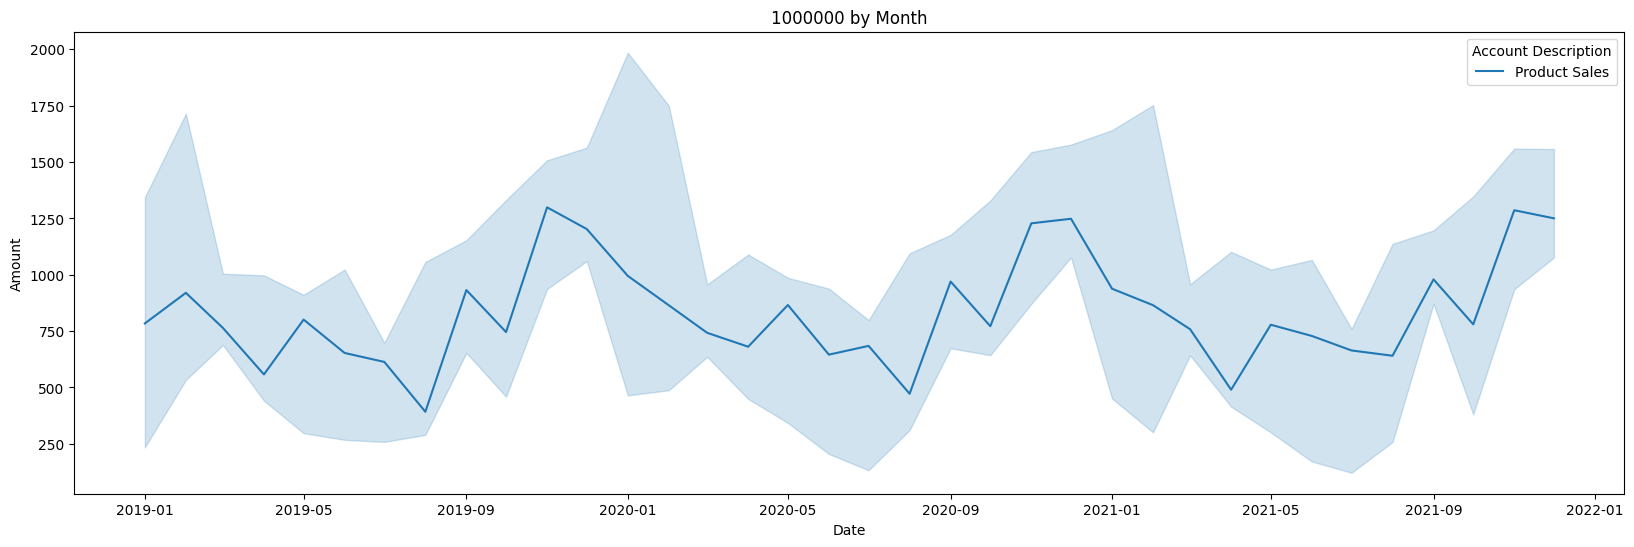

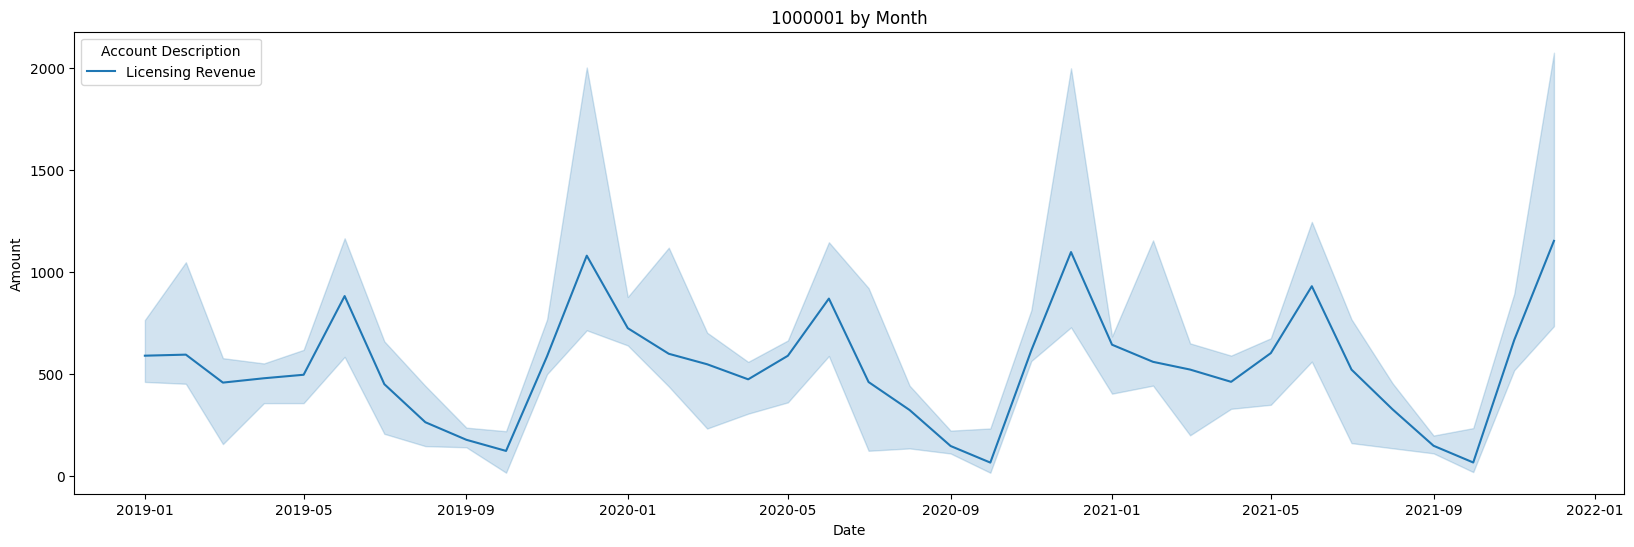

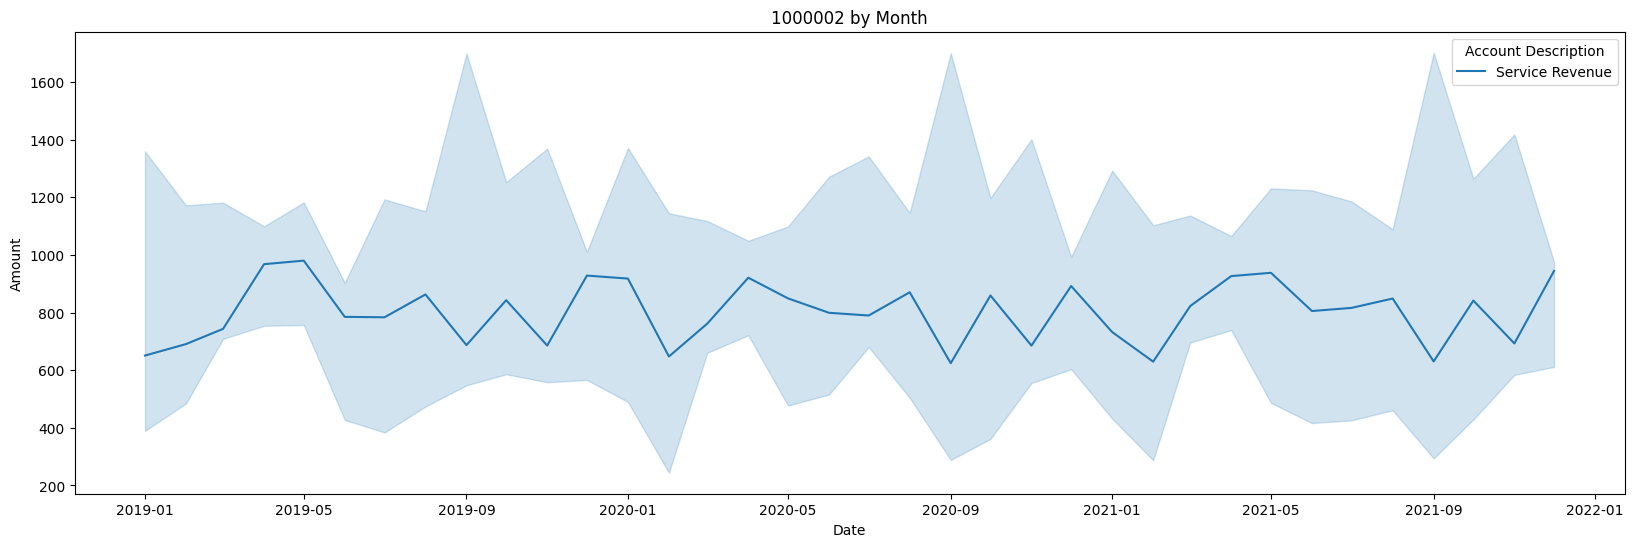

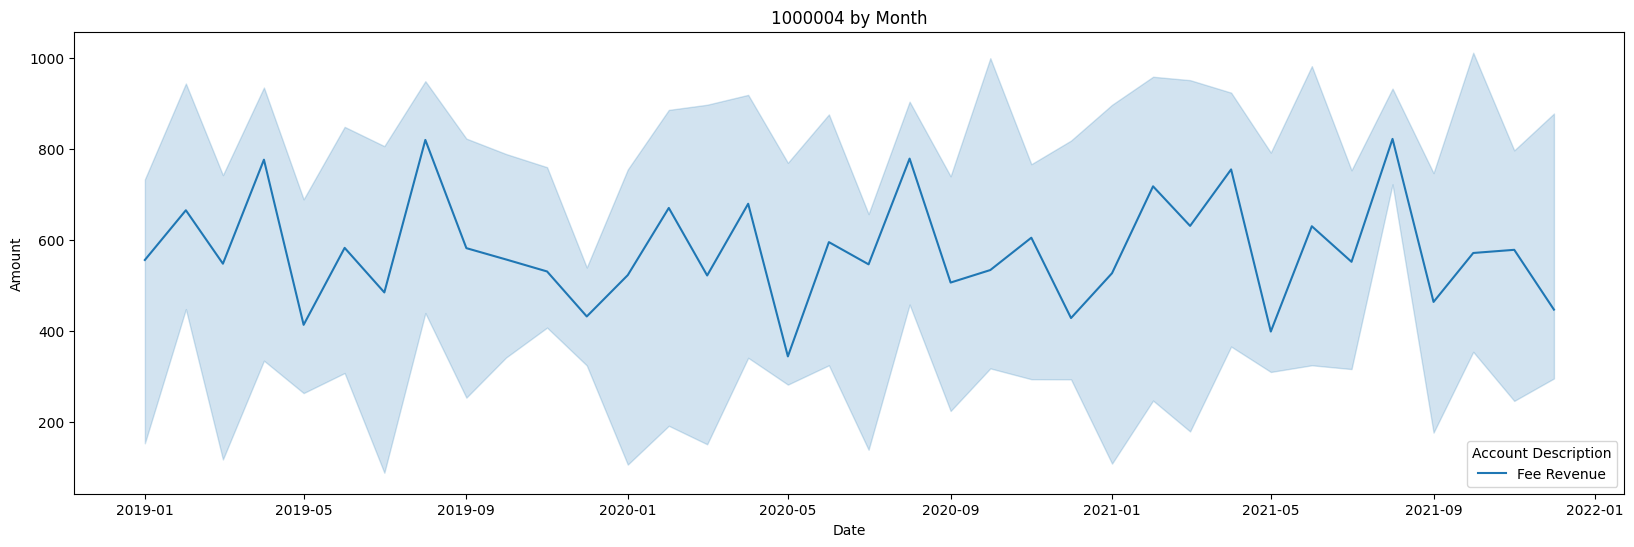

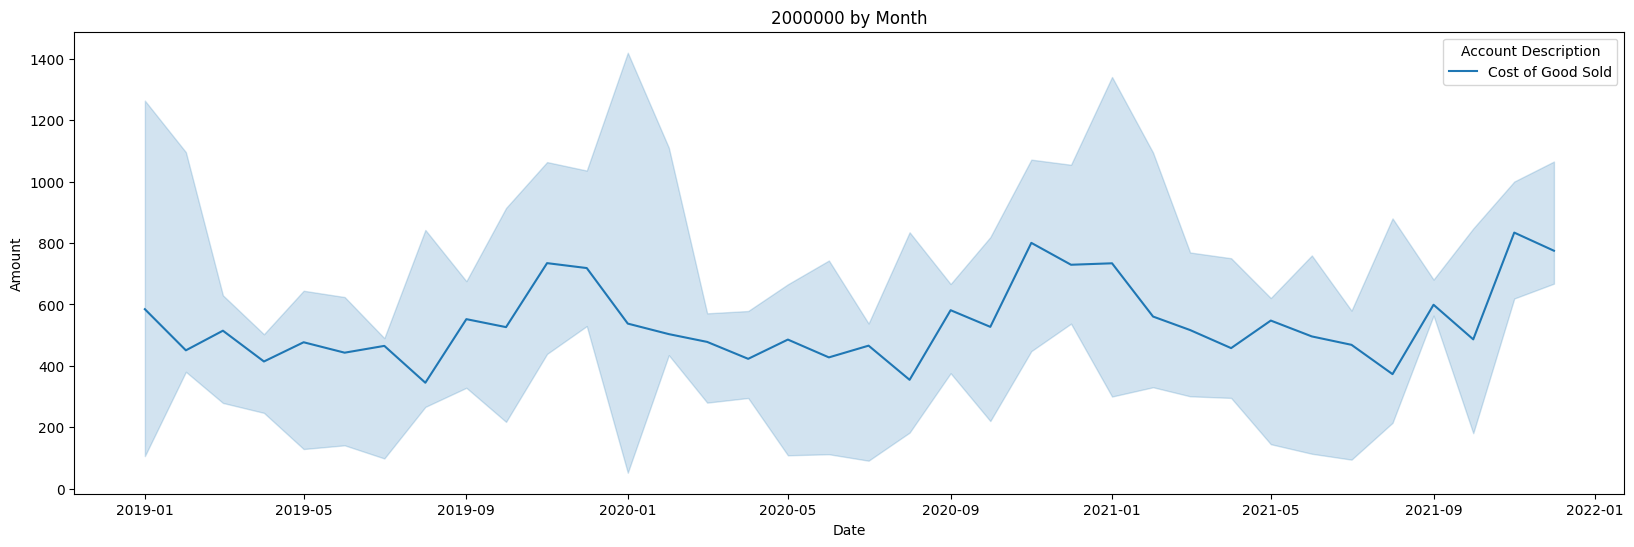

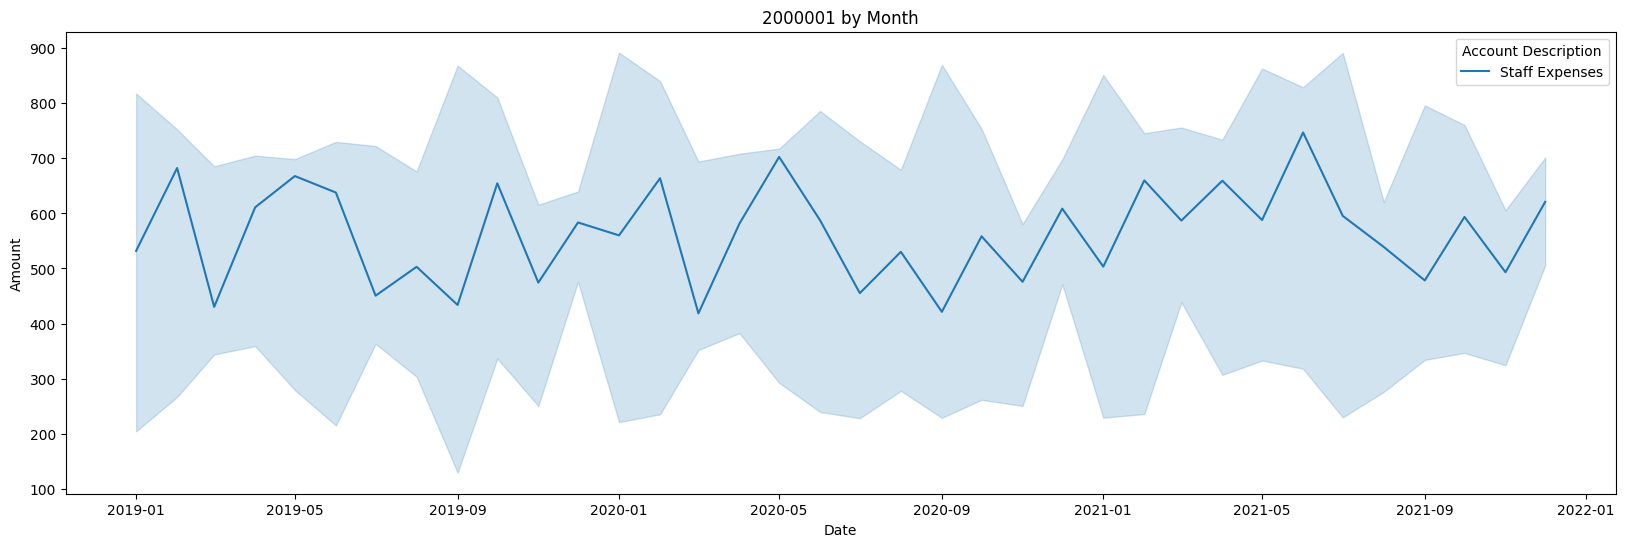

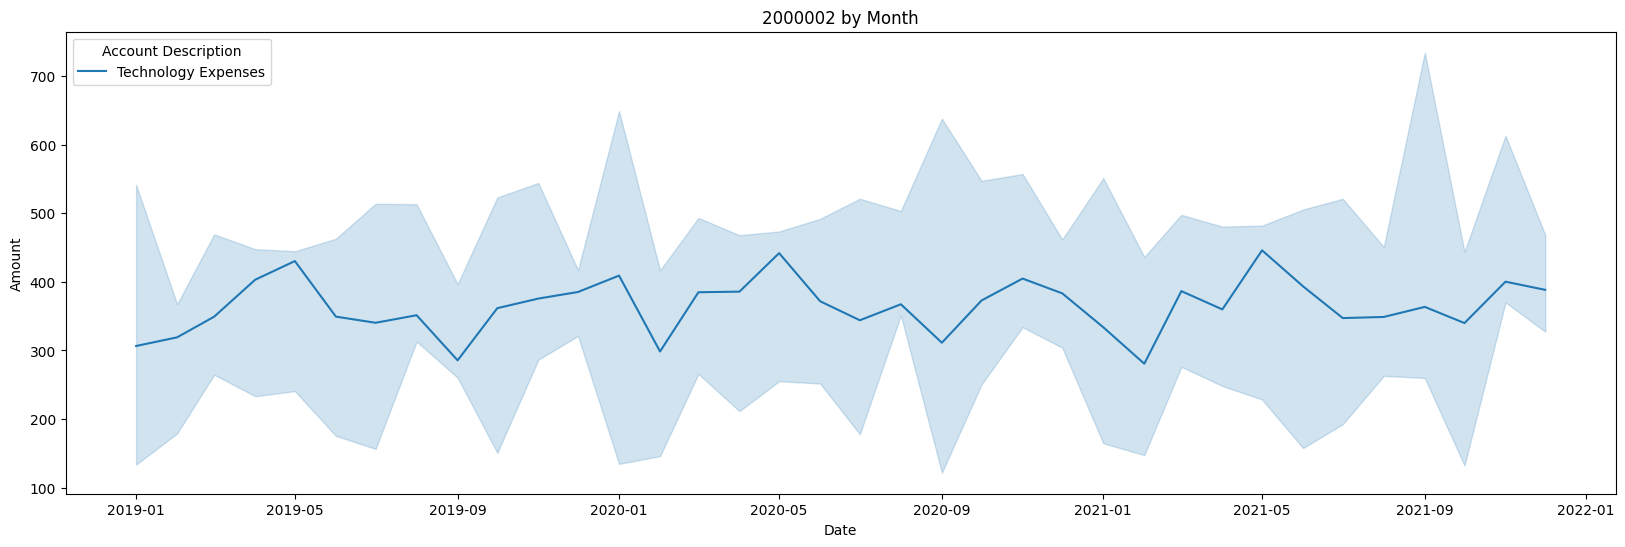

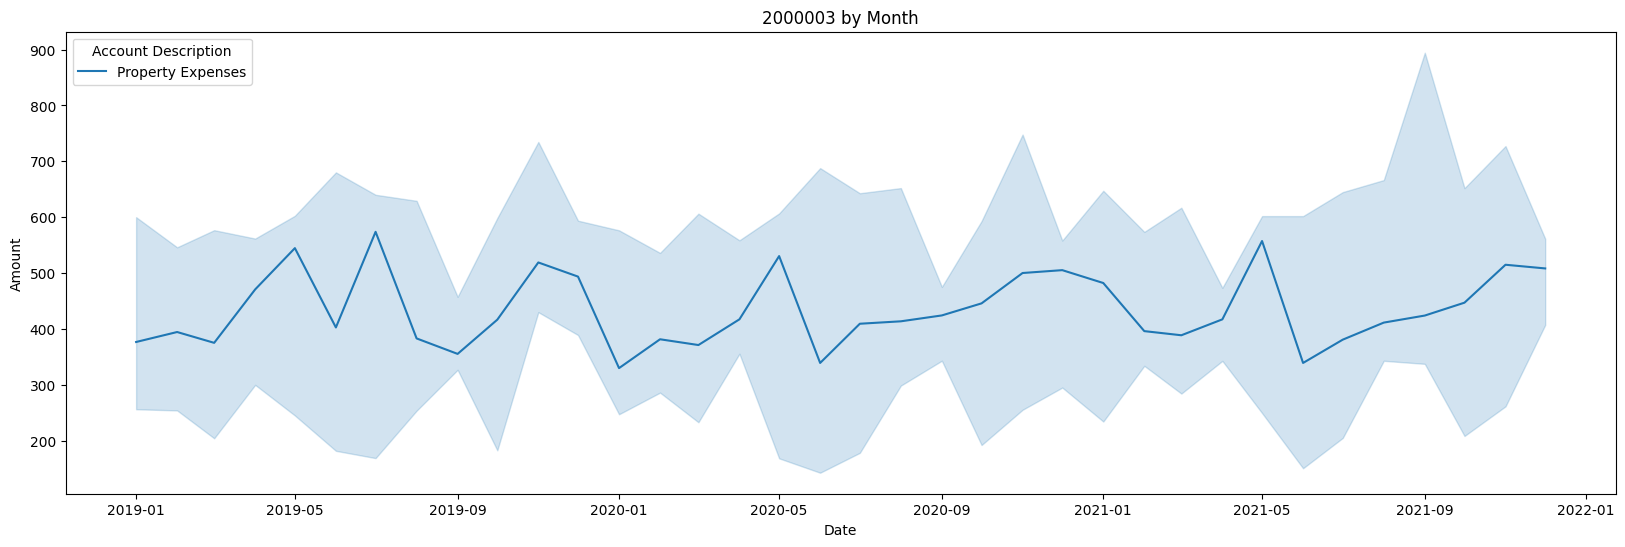

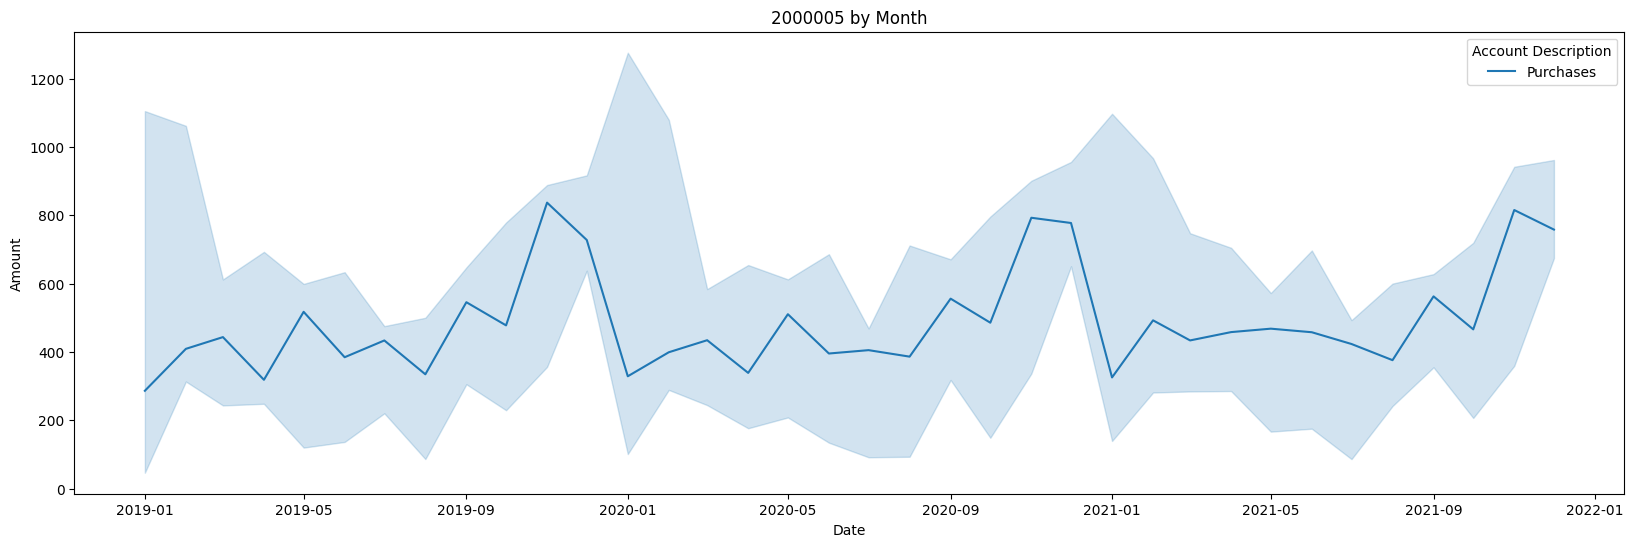

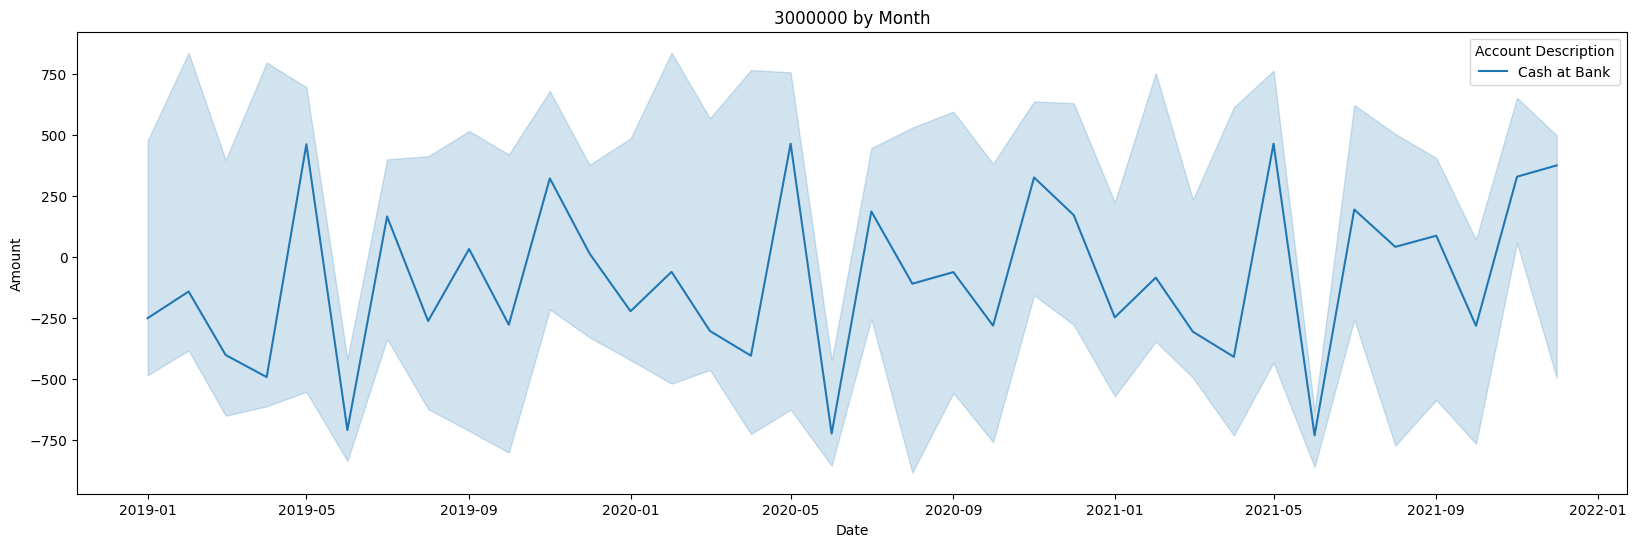

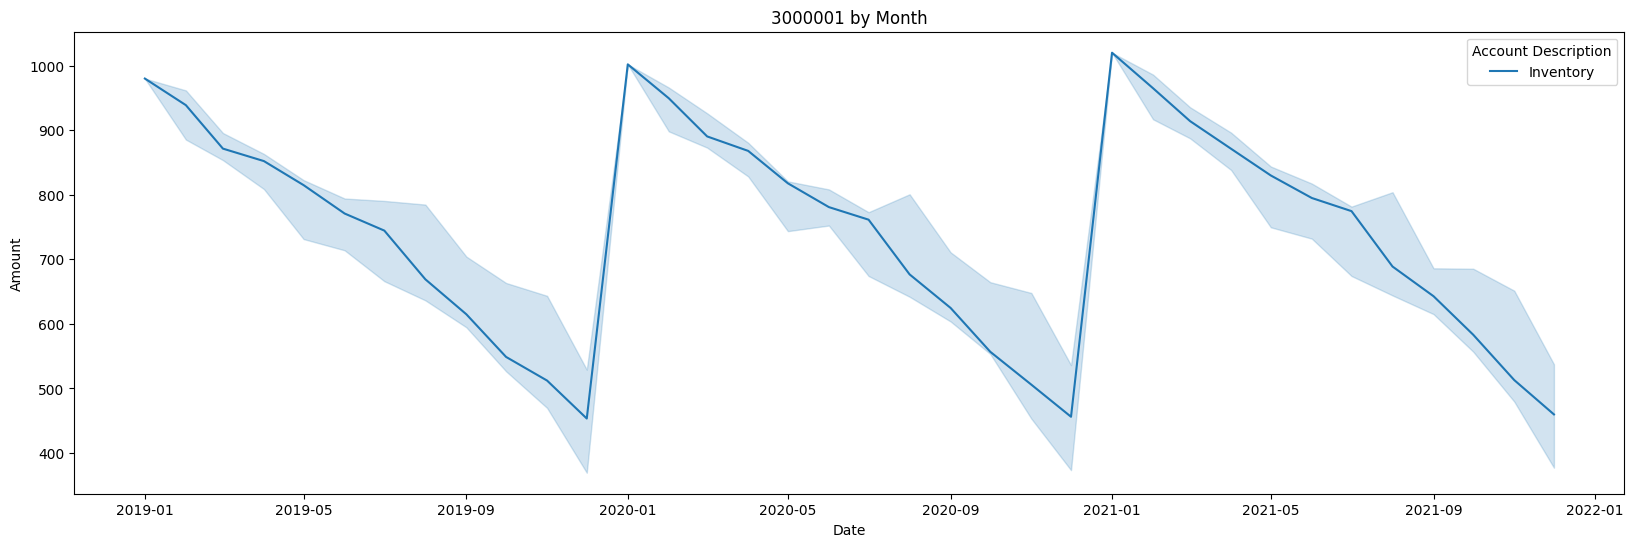

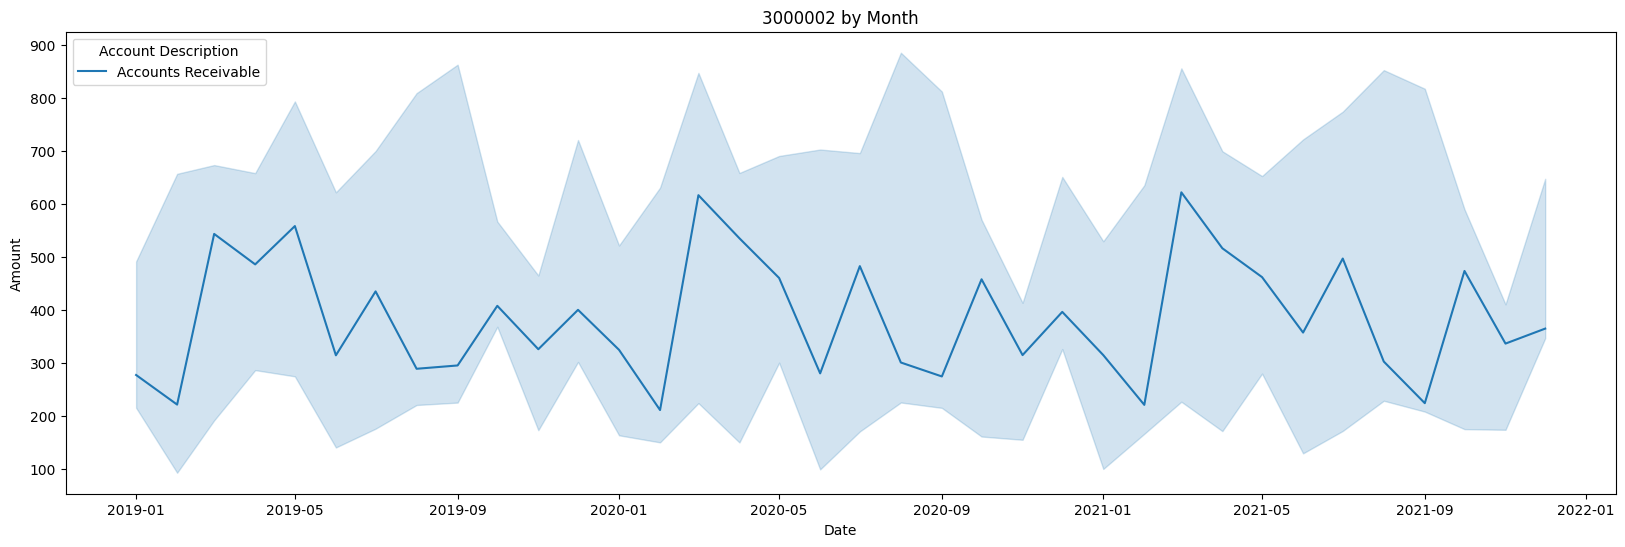

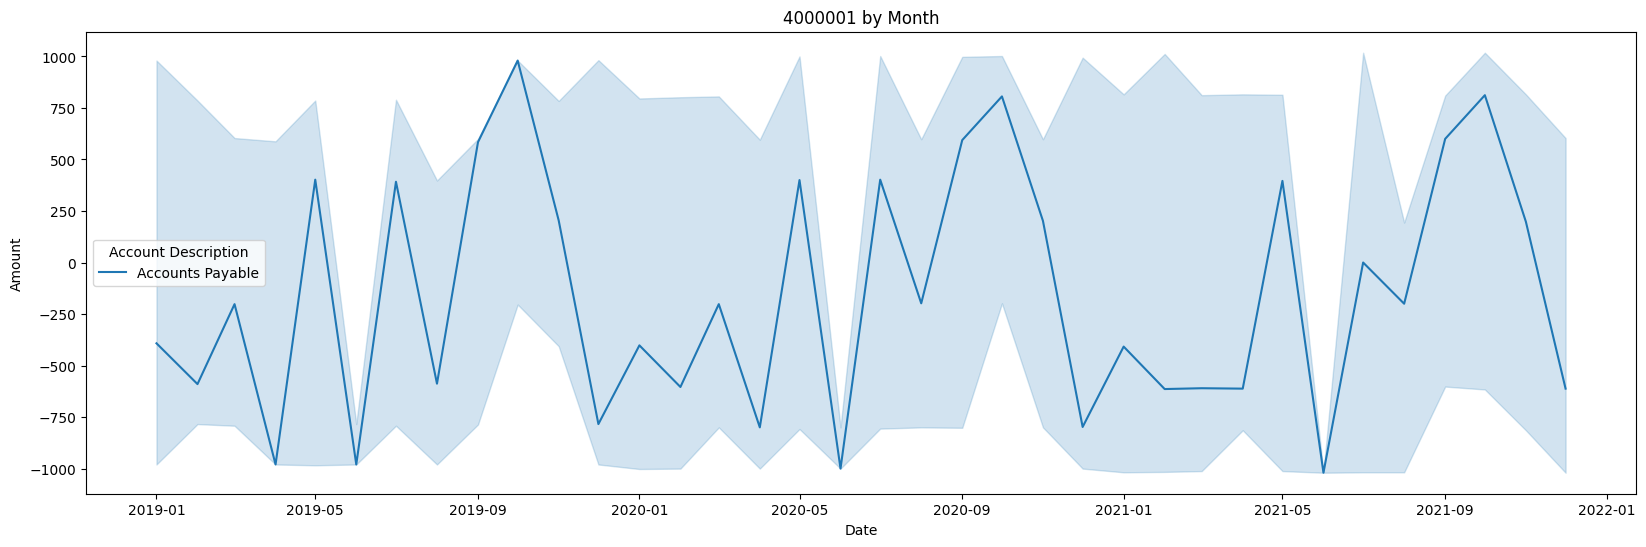

In [ ]:
for account in df['Account'].unique():
    plt.figure(figsize=(20,6))
    sns.lineplot(x='Date', y='Amount', estimator=np.median, hue='Account Description', data=df[df['Account']==account]).set_title('{} by Month'.format(account))
    plt.show()

In [ ]:
df['Account'].unique()

array([1000000, 1000001, 1000002, 1000004, 2000000, 2000001, 2000002,
       2000003, 2000005, 3000000, 3000001, 3000002, 4000001])

**Convert Fields to Correct Data Type**

In [ ]:
df.dtypes

,0
Year,int64
Month,int64
Cost Centre,object
Account,int64
Account Description,object
Account Type,object
Amount,float64
Day,int64
Date,datetime64[ns]


In [ ]:
df['Account'] = 'ACC' + df['Account'].astype(str)

In [ ]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Day,Date
0,2019,1,CC100,ACC1000000,Product Sales,Revenue,1344.051,1,2019-01-01
1,2019,1,CC100,ACC1000001,Licensing Revenue,Revenue,480.968,1,2019-01-01
2,2019,1,CC100,ACC1000002,Service Revenue,Revenue,650.820,1,2019-01-01
3,2019,1,CC100,ACC1000004,Fee Revenue,Revenue,339.360,1,2019-01-01
4,2019,1,CC100,ACC2000000,Cost of Good Sold,Expense,1125.328,1,2019-01-01


In [ ]:
df.dtypes

,0
Year,int64
Month,int64
Cost Centre,object
Account,object
Account Description,object
Account Type,object
Amount,float64
Day,int64
Date,datetime64[ns]


In [ ]:
df['Year'] = df['Year'].astype(str)

In [ ]:
df.dtypes

,0
Year,object
Month,int64
Cost Centre,object
Account,object
Account Description,object
Account Type,object
Amount,float64
Day,int64
Date,datetime64[ns]


**Drop Analysis Fields**

In [ ]:
df.drop(['Month', 'Day', 'Date'], axis=1, inplace=True)

In [ ]:
df.dtypes

,0
Year,object
Cost Centre,object
Account,object
Account Description,object
Account Type,object
Amount,float64


In [ ]:
len(df['Account'].unique())

13

In [ ]:
len(df['Account Description'].unique())

13

In [ ]:
df['AccountVal'] = df['Account'] + df['Account Description']

In [ ]:
df.head()

,Year,Cost Centre,Account,Account Description,Account Type,Amount,AccountVal
0,2019,CC100,ACC1000000,Product Sales,Revenue,1344.051,ACC1000000Product Sales
1,2019,CC100,ACC1000001,Licensing Revenue,Revenue,480.968,ACC1000001Licensing Revenue
2,2019,CC100,ACC1000002,Service Revenue,Revenue,650.820,ACC1000002Service Revenue
3,2019,CC100,ACC1000004,Fee Revenue,Revenue,339.360,ACC1000004Fee Revenue
4,2019,CC100,ACC2000000,Cost of Good Sold,Expense,1125.328,ACC2000000Cost of Good Sold


In [ ]:
len(df['AccountVal'].unique())

13

In [ ]:
df.drop(['Account Description', 'AccountVal'], axis=1, inplace=True)

In [ ]:
df.head()

,Year,Cost Centre,Account,Account Type,Amount
0,2019,CC100,ACC1000000,Revenue,1344.051
1,2019,CC100,ACC1000001,Revenue,480.968
2,2019,CC100,ACC1000002,Revenue,650.820
3,2019,CC100,ACC1000004,Revenue,339.360
4,2019,CC100,ACC2000000,Expense,1125.328


In [ ]:
pd.get_dummies(df)

,Amount,Year_2019,Year_2020,Year_2021,Cost Centre_CC100,Cost Centre_CC101,Cost Centre_CC102,Cost Centre_CC200,Cost Centre_CC201,Cost Centre_CC202,...,Account_ACC2000003,Account_ACC2000005,Account_ACC3000000,Account_ACC3000001,Account_ACC3000002,Account_ACC4000001,Account Type_Asset,Account Type_Expense,Account Type_Liability,Account Type_Revenue
0,1344.051,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,480.968,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,650.820,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,339.360,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1125.328,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,698.121,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
4208,-282.056,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
4209,537.478,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4210,1152.680,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False


In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.head()

,Amount,Year_2019,Year_2020,Year_2021,Cost Centre_CC100,Cost Centre_CC101,Cost Centre_CC102,Cost Centre_CC200,Cost Centre_CC201,Cost Centre_CC202,...,Account_ACC2000003,Account_ACC2000005,Account_ACC3000000,Account_ACC3000001,Account_ACC3000002,Account_ACC4000001,Account Type_Asset,Account Type_Expense,Account Type_Liability,Account Type_Revenue
0,1344.051,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,480.968,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,650.820,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,339.360,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1125.328,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
df.dtypes

,0
Amount,float64
Year_2019,bool
Year_2020,bool
Year_2021,bool
Cost Centre_CC100,bool
Cost Centre_CC101,bool
Cost Centre_CC102,bool
Cost Centre_CC200,bool
Cost Centre_CC201,bool
Cost Centre_CC202,bool


**4. Modelling**

In [ ]:
X = df.drop('Amount', axis=1)
y = df['Amount']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1234)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2948, 29) (1264, 29) (2948,) (1264,)


**Import Dependencies**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
pipelines = {
    'rf':make_pipeline(RandomForestRegressor(random_state=1234)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge':make_pipeline(Ridge(random_state=1234)),
    'lasso':make_pipeline(Lasso(random_state=1234)),
    'enet':make_pipeline(ElasticNet(random_state=1234)),
}

In [ ]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
hypergrid = {
    'rf': {
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3]
    },
    'gb':{
        'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge':{
        'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso':{
        'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'enet':{
        'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [ ]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting training for rf.
rf has been successfully fit.
Starting training for gb.
gb has been successfully fit.
Starting training for ridge.
ridge has been successfully fit.
Starting training for lasso.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.365e+07, tolerance: 6.673e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.289e+07, tolerance: 6.519e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.510e+07, tolerance: 6.693e

lasso has been successfully fit.
Starting training for enet.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.843e+07, tolerance: 6.673e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.731e+07, tolerance: 6.519e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.054e+07, tolerance: 6.693e

enet has been successfully fit.


In [ ]:
fit_models['ridge'].predict(X_test)

array([ 438.81703559,  535.3336374 ,  466.89651373, ..., -298.00107856,
        599.42413496,  509.10563129])

**5. Evaluation**

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
for algo,model in fit_models.items():
    yhat = model.predict(X_test)
    print('{} scores - R2:{} MAE:{}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))

rf scores - R2:0.468544828143186 MAE:227.58331934520152
gb scores - R2:0.5250074579759179 MAE:216.73949134521456
ridge scores - R2:0.49822285961802093 MAE:224.66813970833948
lasso scores - R2:0.4983082829559342 MAE:224.60359929143758
enet scores - R2:0.49742867415640635 MAE:224.69473557429978


In [ ]:
best_model = fit_models['rf']

In [ ]:
best_model

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(random_state=1234))]),
             n_jobs=1,
             param_grid={'randomforestregressor__min_samples_leaf': [1, 2, 3],
                         'randomforestregressor__min_samples_split': [2, 4, 6]})

**6. Deployment**

URLS
Dallas: https://us-south.ml.cloud.ibm.com,           
London - https://eu-gb.ml.cloud.ibm.com,                                  
Frankfurt - https://eu-de.ml.cloud.ibm.com,                                
Tokyo - https://jp-tok.ml.cloud.ibm.com

**6.1 Import and Install dependencies**

In [ ]:
!pip install -U ibm-watson-machine-learning

In [ ]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

**6.2 Authenticate and Set Space**

In [ ]:
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "AoVuh3D_lfzcnCCbAIK2rzt2F6KVyVX3Vmy_nRvNsHqI"
}

In [ ]:
from ibm_watson_machine_learning import APIClient

wml_client = APIClient(wml_credentials)

In [ ]:
wml_client.spaces.list()


Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------------------------  ------------------------
ID                                    NAME                       CREATED
f41a70c6-c072-4e67-a7e8-9af97bc5aa80  PROD                       2025-10-31T00:30:37.874Z
a85c3917-1511-44b5-a800-28a3cc536be9  Despliegue bank algoritmo  2025-10-30T20:44:13.895Z
------------------------------------  -------------------------  ------------------------


,ID,NAME,CREATED
0,f41a70c6-c072-4e67-a7e8-9af97bc5aa80,PROD,2025-10-31T00:30:37.874Z
1,a85c3917-1511-44b5-a800-28a3cc536be9,Despliegue bank algoritmo,2025-10-30T20:44:13.895Z


In [ ]:
SPACE_ID="f41a70c6-c072-4e67-a7e8-9af97bc5aa80"

In [ ]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

**6.3 Save and Deploy Model**

In [ ]:
MODEL_NAME = 'Sklearn Forecast'
DEPLOYMENT_NAME = 'Sklearn Deployment'
BEST_MODEL = best_model

In [ ]:
# Selecciona la versión moderna del runtime
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-24.1-py3.11')

# Configura propiedades del modelo
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.3',  # ✅ actualizado
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}

# Guarda el modelo en IBM Watson
model_details = wml_client.repository.store_model(
    model=BEST_MODEL,
    meta_props=model_props,
    training_data=X_train.head(),
    training_target=y_train.head()
)

In [ ]:
model_details

{'metadata': {'name': 'Sklearn Forecast',
  'space_id': 'f41a70c6-c072-4e67-a7e8-9af97bc5aa80',
  'resource_key': 'af50eb48-9d99-425d-8e35-cf16df132a0f',
  'id': '63bd1149-cb96-4ad9-ac0e-7813917bff88',
  'created_at': '2025-10-31T01:02:21Z',
  'rov': {'member_roles': {'IBMid-6940017XMT': {'user_iam_id': 'IBMid-6940017XMT',
     'roles': ['OWNER']}}},
  'owner': 'IBMid-6940017XMT'},
 'entity': {'software_spec': {'id': '45f12dfe-aa78-5b8d-9f38-0ee223c47309'},
  'type': 'scikit-learn_1.3',
  'training_data_references': [{'id': '1',
    'type': 'container',
    'connection': None,
    'location': {},
    'schema': {'id': '1',
     'type': 'DataFrame',
     'fields': [{'name': 'Year_2019', 'type': 'bool', 'nullable': False},
      {'name': 'Year_2020', 'type': 'bool', 'nullable': False},
      {'name': 'Year_2021', 'type': 'bool', 'nullable': False},
      {'name': 'Cost Centre_CC100', 'type': 'bool', 'nullable': False},
      {'name': 'Cost Centre_CC101', 'type': 'bool', 'nullable': False}

In [ ]:
model_id = wml_client.repository.get_model_id(model_details); model_uid

'63bd1149-cb96-4ad9-ac0e-7813917bff88'

In [ ]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_uid,
    meta_props=deployment_props
)

# Output result
deployment




#######################################################################################

Synchronous deployment creation for uid: '63bd1149-cb96-4ad9-ac0e-7813917bff88' started

#######################################################################################


initializing
Note: online_url and serving_urls are deprecated and will be removed in a future release. Use inference instead.
....
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='aba20af9-5395-4e9a-826f-fb2b7267a6b2'
------------------------------------------------------------------------------------------------




{'entity': {'asset': {'id': '63bd1149-cb96-4ad9-ac0e-7813917bff88'},
  'chat_enabled': False,
  'custom': {},
  'deployed_asset_type': 'model',
  'hardware_spec': {'name': 'S', 'num_nodes': 1},
  'name': 'Sklearn Deployment',
  'online': {},
  'space_id': 'f41a70c6-c072-4e67-a7e8-9af97bc5aa80',
  'status': {'inference': [{'url': 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/aba20af9-5395-4e9a-826f-fb2b7267a6b2/predictions'}],
   'online_url': {'url': 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/aba20af9-5395-4e9a-826f-fb2b7267a6b2/predictions'},
   'serving_urls': ['https://us-south.ml.cloud.ibm.com/ml/v4/deployments/aba20af9-5395-4e9a-826f-fb2b7267a6b2/predictions'],
   'state': 'ready'}},
 'metadata': {'created_at': '2025-10-31T01:03:49.900Z',
  'id': 'aba20af9-5395-4e9a-826f-fb2b7267a6b2',
  'modified_at': '2025-10-31T01:03:49.900Z',
  'name': 'Sklearn Deployment',
  'owner': 'IBMid-6940017XMT',
  'space_id': 'f41a70c6-c072-4e67-a7e8-9af97bc5aa80'},
 'system': {'warni

**6.4 Score Against Deployed Model**

In [ ]:
deployment_uid = wml_client.deployments.get_uid(deployment)
payload = {"input_data":
           [
               {"fields":X_test.columns.to_numpy().tolist(), "values":X_test.to_numpy().tolist()}
           ]
          }
result = wml_client.deployments.score(deployment_uid, payload); result

{'predictions': [{'fields': ['prediction'],
   'values': [[446.3717444383879],
    [786.9305568740841],
    [398.47703130576355],
    [354.1257364542957],
    [667.9508493115422],
    [197.13126882199168],
    [467.37229993989143],
    [5.089409590478971],
    [452.83825487842137],
    [535.9560570149712],
    [502.13723010660186],
    [460.2575417534865],
    [565.5045591591189],
    [780.164186033562],
    [567.010070338574],
    [-350.9629089048207],
    [667.9508493115422],
    [831.359685768062],
    [524.5903472636252],
    [567.010070338574],
    [389.72143260333434],
    [349.49044451824557],
    [305.40439554650914],
    [313.3717480538806],
    [-505.8034758192638],
    [559.69441774957],
    [29.538721828421572],
    [470.42782604109794],
    [677.117348262775],
    [-539.8678348689205],
    [-648.7147479742478],
    [464.3562789626828],
    [705.0967212911812],
    [852.5073931666152],
    [5.089409590478971],
    [784.7991202407035],
    [-199.80568453679655],
    [591.208

In [ ]:
pred_values = np.squeeze(result['predictions'][0]['values']); pred_values
preddf = X_test.join(y_test)
preddf['Scores'] = pred_values
preddf.head()

,Year_2019,Year_2020,Year_2021,Cost Centre_CC100,Cost Centre_CC101,Cost Centre_CC102,Cost Centre_CC200,Cost Centre_CC201,Cost Centre_CC202,Cost Centre_CC300,...,Account_ACC3000000,Account_ACC3000001,Account_ACC3000002,Account_ACC4000001,Account Type_Asset,Account Type_Expense,Account Type_Liability,Account Type_Revenue,Amount,Scores
4050,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,514.924,446.371744
3576,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,699.906,786.930557
292,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,453.516,398.477031
1864,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,492.930,354.125736
2055,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,998.773,667.950849


In [ ]:
pred_values

array([ 446.37174444,  786.93055687,  398.47703131, ..., -803.54414502,
        542.62360209,  507.64524   ])

In [ ]:
preddf.to_csv('results.csv')